#### TeamScoreboard.
##### How the Skills of the given candidate impact to the team results. (Positive or negative inpact on team skils)


In [1]:
from set_the_candidate_score_dict import the_candidate

import numpy as np
import pandas as pd
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# print the graphs in the notebook
%matplotlib inline
# set seaborn style to white
sns.set_style("white")
import openpyxl

In [2]:
#Clean df data:
the_candidate  # dict
keys_to_delete = ['Recommendation', 'First_impression', 'Willness_to_learn', 'Willness_to_knowledge_sharing']
for key in keys_to_delete:
    if key in the_candidate:
        del the_candidate[key]
#the_candidate

In [3]:
given_person = pd.DataFrame(dict(the_candidate).items())
given_person.rename(columns={0: 'Skills', 1: 'C_Score'}, inplace=True)
given_person

Skills  C_Score
0         Years_of_Expirience      7.0
1                Coding_skill      7.5
2  System_architect_knowledge      6.0
3            Common_knowledge      7.0
4      Algorithms_data_struct      6.0
5                  Soft_Skill      7.0
6                   Education      3.0
7               Communication      6.0
8                Certificates      3.0
9                  Motivation      7.0

In [4]:
# The current Team Scoring 
team_score = pd.read_excel('TeamScoring.xlsx')
team_score['curent_mean'] = team_score.mean(numeric_only=True, axis=1)
team_score

Skills  CEO  COO  CTO  CFO  CMO  CIO  ResearcherTeam  \
0         Years_of_Expirience    9    9    9    9    9    9               6   
1                Coding_skill    7    4    9    4    5    6               6   
2  System_architect_knowledge    6    3    8    3    4    8               5   
3            Common_knowledge    7    5    9    5    5    8               7   
4      Algorithms_data_struct    5    3    8    4    4    7               9   
5                  Soft_Skill   10    8    8    7    8    7               6   
6                   Education    3    2    3    3    3    2               5   
7                Comunication    9    9    8    7    9    8               6   
8                Certificates    5    1    3    1    2    2               3   
9                  Motivation    5    5    5    5    5    5               5   

   QA team  Dev Team  curent_mean  
0        5         8     8.111111  
1        5         7     5.888889  
2        7         6     5.555556  
3        8         7     6.777778  
4        8         6     6.000000  
5        6         6     7.333333  
6        2         2     2.777778  
7        8         6     7.777778  
8        2         2     2.333333  
9        5         5     5.000000

In [5]:
# Create df for compare result of adding new candidate to Team.
new_team_score = team_score[['Skills', 'curent_mean']]
new_score = new_team_score.copy()
new_score['given_person_score'] = given_person['C_Score']

In [6]:
# Calculate a new mean and impact value of adding given candidate to the team:
add_new_mean = new_score.copy()
add_new_mean['new_mean']= add_new_mean.mean(numeric_only=True, axis=1)
impact = add_new_mean['new_mean'] - add_new_mean['curent_mean'] # Positive or negative inpact on team skils
add_new_mean['Impact'] = impact
#
Results = add_new_mean.copy()

In [7]:
del Results['given_person_score']
Results

Skills  curent_mean  new_mean    Impact
0         Years_of_Expirience     8.111111  7.555556 -0.555556
1                Coding_skill     5.888889  6.694444  0.805556
2  System_architect_knowledge     5.555556  5.777778  0.222222
3            Common_knowledge     6.777778  6.888889  0.111111
4      Algorithms_data_struct     6.000000  6.000000  0.000000
5                  Soft_Skill     7.333333  7.166667 -0.166667
6                   Education     2.777778  2.888889  0.111111
7                Comunication     7.777778  6.888889 -0.888889
8                Certificates     2.333333  2.666667  0.333333
9                  Motivation     5.000000  6.000000  1.000000

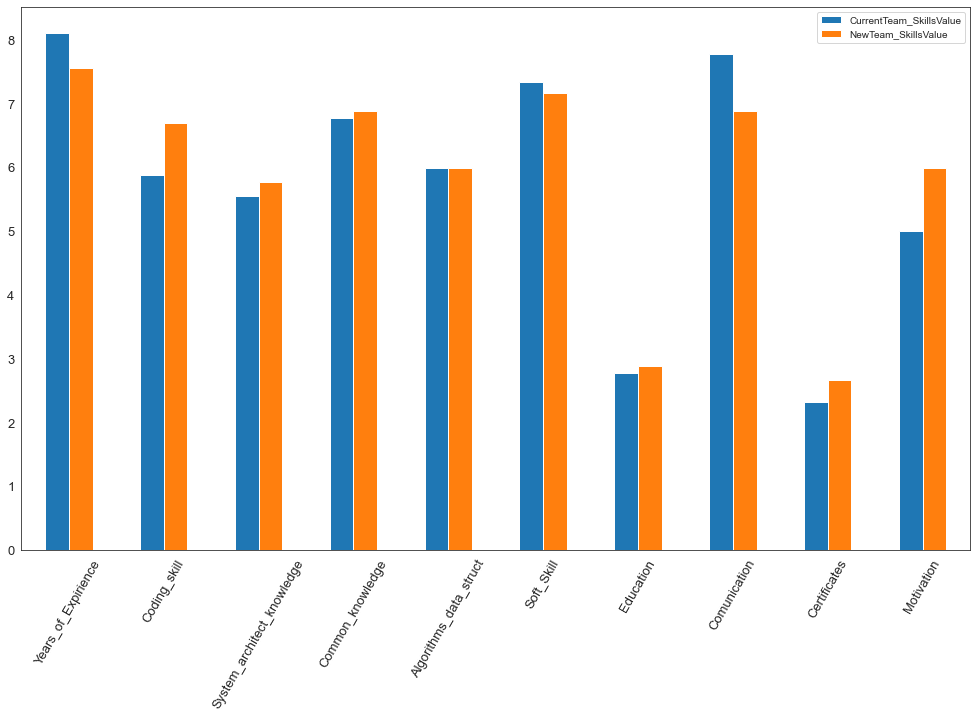

In [8]:
# PLOT RESULTS BY SKILLS
old_mean_value = list(Results['curent_mean'])
new_mean_value = list(Results['new_mean'])
index = list(Results['Skills'])
df = pd.DataFrame({'CurrentTeam_SkillsValue': old_mean_value,'NewTeam_SkillsValue': new_mean_value}, index=index)
ax = df.plot.bar(figsize=(17,10), rot=60, fontsize=13)